In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [2]:
df = pd.read_csv('radars.csv')

In [3]:
df['Player'] = df['Player'].str.split('\\',expand=True)[0]
df.sort_values('Gls')

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
316,317,Lys Mousset,fr FRA,FW,Sheffield Utd,25-022,1996,2.3,0,3,...,17.2,0,0,0,0.6,0.6,0.21,-0.6,-0.6,Matches
313,314,Wes Morgan,jm JAM,DF,Leicester City,37-040,1984,0.2,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
312,313,Jayson Molumby,ie IRL,MF,Brighton,21-208,1999,0.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
311,312,Jakub Moder,pl POL,MF,Brighton,21-329,1999,0.1,0,1,...,33.0,0,0,0,0.0,0.0,0.02,0.0,0.0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,192,Son Heung-min,kr KOR,FW,Tottenham,28-237,1992,23.9,13,47,...,17.1,1,0,0,7.5,7.5,0.16,5.5,5.5,Matches
41,42,Patrick Bamford,eng ENG,FW,Leeds United,27-178,1993,24.8,13,83,...,12.7,0,1,1,12.7,12.0,0.14,0.3,0.0,Matches
221,222,Harry Kane,eng ENG,FW,Tottenham,27-217,1993,22.4,14,85,...,18.2,7,3,3,11.8,9.6,0.11,2.2,1.4,Matches
141,142,Bruno Fernandes,pt POR,MF,Manchester Utd,26-175,1994,24.4,15,77,...,22.9,11,7,8,11.7,5.6,0.07,3.3,2.4,Matches


In [4]:
df = df[(df['Player'] == 'Harry Kane') | (df['Player'] == 'Patrick Bamford')].reset_index()

In [5]:
df = df.drop(['index','Rk','Nation','Pos','Squad','Age','Born','90s','FK','PK','PKatt','Matches'],axis=1)

In [6]:
params = list(df.columns)
params = params[1:]

In [7]:
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*.25)
    
    b = max(df[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))
    
for x in range(len(df['Player'])):
    if df['Player'][x] == 'Harry Kane':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Patrick Bamford':
        b_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [8]:
title = dict(
    title_name='Patrick Bamford',
    title_color = 'purple',
    subtitle_name = 'Leeds',
    subtitle_color = 'purple',
    title_name_2='Harry Kane',
    title_color_2 = 'black',
    subtitle_name_2 = 'Tottenham',
    subtitle_color_2 = 'black',
    title_fontsize = 18,
    subtitle_fontsize=15
)

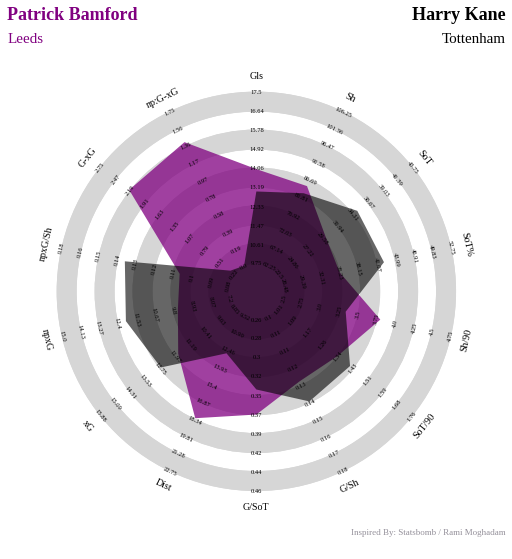

In [9]:
radar = Radar()

fig, ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['purple','black'],
                         alphas=[.75,.6],title=title,
                         compare=True)
plt.savefig('scouting1.png')